In [ ]:
출처 : https://github.com/alexavierc/LSTM-Stock-Prices

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

from keras.models import load_model

# Prediction of Closing Price of Stock LSTM
The goal is to predict the Closing Price behavior of Hyundai by predicting `n` coming days (`forward_days`), using as input the `m` past days (`look_back`).


In [ ]:
num_companies = 1
look_back = 40
forward_days = 10
num_periods = 20

companies_names = ['Hyundai']
colors = ['r','g'] #from matplotlib

First, just open the CSV using Pandas, set the Date as index and keep only the Closing Price column.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_A = pd.read_csv('/content/drive/My Drive/Hyundai.csv')
df_A['Date'] = pd.to_datetime(df_A['Date'])


Note: make sure the all the dates in each and every df are the same. (In this dataset, they are)

In [ ]:
companies = [df_A]

for comapany in companies:
    comapany.set_index('Date', inplace=True)
    comapany.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [ ]:
print(len(df_A))

1475


# Data visualization

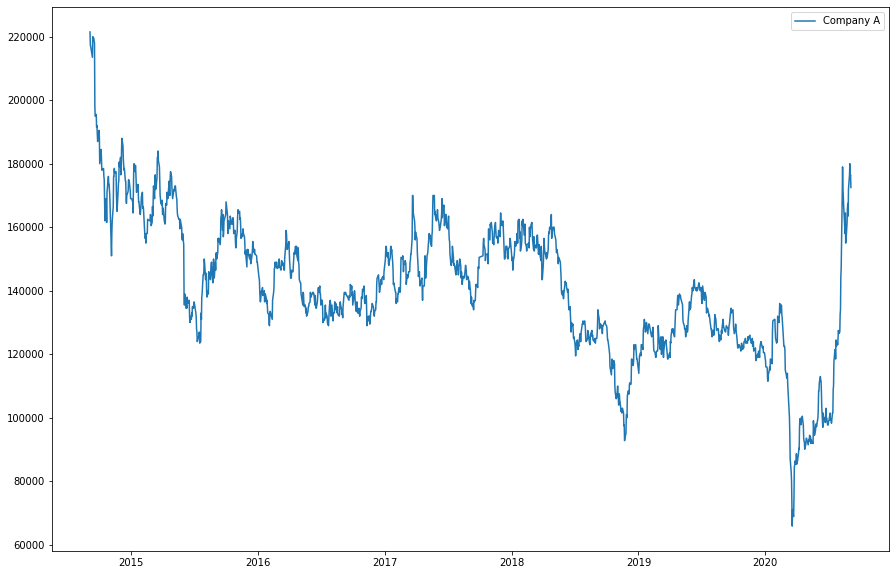

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(df_A, label='Company A')
# KRX 데이터의 경우 CSV 파일 내부의 셀 서식을 일반으로 변경해야 됨

plt.legend(loc='best')
plt.show()

### Data normalization

In [ ]:
scl = MinMaxScaler()
    
args = [company.values.reshape(company.shape[0],1) for company in companies]

In [ ]:
array = scl.fit_transform((args[0]))

### Split all the data in two categories: Data to Train/Validate the LSTM and Data to Test the model
All this process is explained on the notebook: LSTM input and output.

In [ ]:
#split in Train and Test
division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [ ]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,num_companies,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [ ]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days,num_companies)
y = np.array([list(x.ravel()) for x in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)
#(Sample,Timestep,Features)

(980, 40, 1)
(246, 40, 1)
(20, 40, 1)
(980, 10)
(246, 10)
(20, 10)


## Train the LSTM

In [ ]:
#Optionaly, you can load a model
#model = load_model('Trained/several-companies/LSTM_LB40_FD10_E200_F100_S50.h5')
#If you do, don't reTrain or reSave it...

In [ ]:
NUM_NEURONS_FirstLayer = 200
NUM_NEURONS_SecondLayer = 100
EPOCHS = 250

#Build the model
model = Sequential()

model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,num_companies), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days * num_companies))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=1, verbose=2)

Epoch 1/250
980/980 - 6s - loss: 0.0044 - val_loss: 0.0035
Epoch 2/250
980/980 - 5s - loss: 0.0024 - val_loss: 0.0017
Epoch 3/250
980/980 - 5s - loss: 0.0021 - val_loss: 0.0017
Epoch 4/250
980/980 - 5s - loss: 0.0021 - val_loss: 0.0022
Epoch 5/250
980/980 - 6s - loss: 0.0019 - val_loss: 0.0024
Epoch 6/250
980/980 - 5s - loss: 0.0018 - val_loss: 0.0022
Epoch 7/250
980/980 - 5s - loss: 0.0018 - val_loss: 0.0015
Epoch 8/250
980/980 - 5s - loss: 0.0017 - val_loss: 0.0019
Epoch 9/250
980/980 - 5s - loss: 0.0017 - val_loss: 0.0018
Epoch 10/250
980/980 - 5s - loss: 0.0017 - val_loss: 0.0018
Epoch 11/250
980/980 - 5s - loss: 0.0017 - val_loss: 0.0014
Epoch 12/250
980/980 - 5s - loss: 0.0016 - val_loss: 0.0023
Epoch 13/250
980/980 - 5s - loss: 0.0016 - val_loss: 0.0014
Epoch 14/250
980/980 - 5s - loss: 0.0016 - val_loss: 0.0014
Epoch 15/250
980/980 - 5s - loss: 0.0015 - val_loss: 0.0014
Epoch 16/250
980/980 - 5s - loss: 0.0015 - val_loss: 0.0017
Epoch 17/250
980/980 - 5s - loss: 0.0015 - val_lo

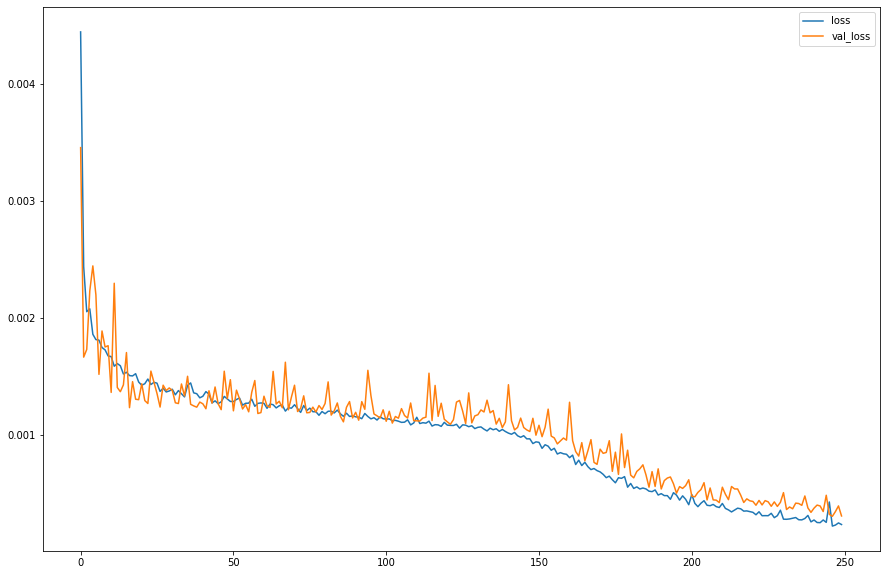

In [ ]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

### Predicting the Test Set to see the results
This process is also explained on the notebook: LSTM input and output.

In [ ]:
#Saving the model
# file_name = 'Redes/several-companies/LSTM_LB{}_FD{}_E{}_F{}_S{}.h5'.format(look_back, forward_days, EPOCHS, NUM_NEURONS_FirstLayer, NUM_NEURONS_SecondLayer)
# model.save(file_name)
# print("Saved model `{}` to disk".format(file_name))

In [ ]:
X_test,y_test = processData(array_test,look_back,forward_days,num_companies,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

Xt = model.predict(X_test)
Xt.shape

(20, 10)

In [ ]:
def do_inverse_transform(output_result,num_companies = 1):
    #From input/output nootbook: apply makeup, use scl.inverse_transform and remove makeup
    
    #transform to input shape
    original_matrix_format = []
    for result in output_result:
        #do inverse transform
        original_matrix_format.append(scl.inverse_transform([result[x:x+num_companies] for x in range(0, len(result), num_companies)]))
    original_matrix_format = np.array(original_matrix_format)
    
    #restore to original shape
    for i in range(len(original_matrix_format)):
        output_result[i] = original_matrix_format[i].ravel()

    return output_result

In [ ]:
def prediction_by_step_by_company(raw_model_output, num_companies):
    matrix_prediction = []
    for i in range(0,num_companies):
        matrix_prediction.append([[lista[j] for j in range(i,len(lista),num_companies)] for lista in raw_model_output])
    return np.array(matrix_prediction)

In [ ]:
Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(1, 20, 10)

In [ ]:
def target_by_company(raw_model_output, num_companies):
    matrix_target = [[] for x in range(num_companies)]
    
    for output in raw_model_output:
        for i in range (num_companies):
            for j in range(0,len(output),num_companies):
                matrix_target[i].append(output[i+j])
    return np.array(matrix_target)

In [ ]:
Yt = do_inverse_transform(y_test)

MT = target_by_company(Yt, num_companies)
MT.shape

(1, 200)

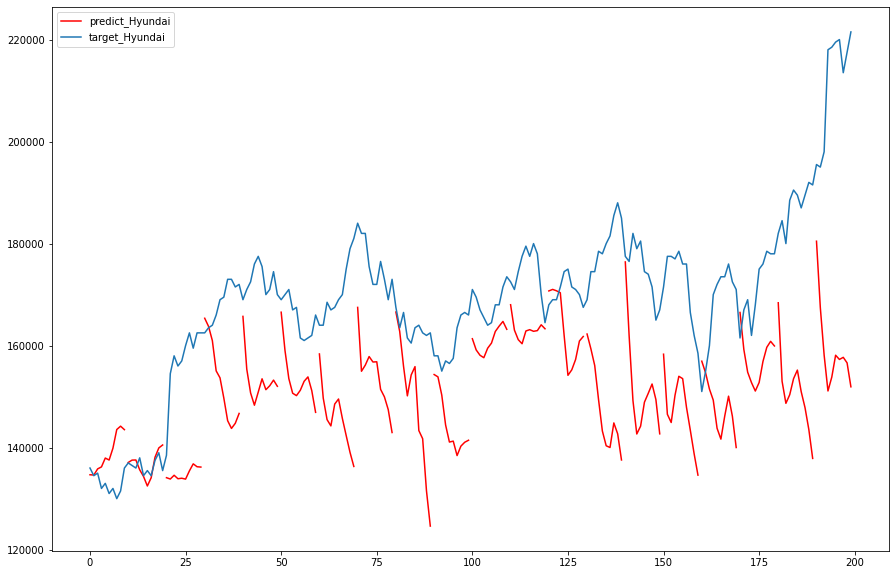

In [ ]:
plt.figure(figsize = (15,10))

companies_to_show = [0] #select one of [0,1,2,3] to see only one


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()

### Predicting all the data to see how the model reacts to Train and Test set

In [ ]:
X_all,y_all = processData(array,look_back,forward_days,num_companies,forward_days)
y_all = np.array([list(a.ravel()) for a in y_all])

In [ ]:
Xt = model.predict(X_all)
Xt.shape

(143, 10)

In [ ]:
Xt = do_inverse_transform(Xt)

MP = prediction_by_step_by_company(Xt, num_companies)
MP.shape

(1, 143, 10)

In [ ]:
Yt = do_inverse_transform(y_all)

MT = target_by_company(Yt, num_companies)
MT.shape

(1, 1430)

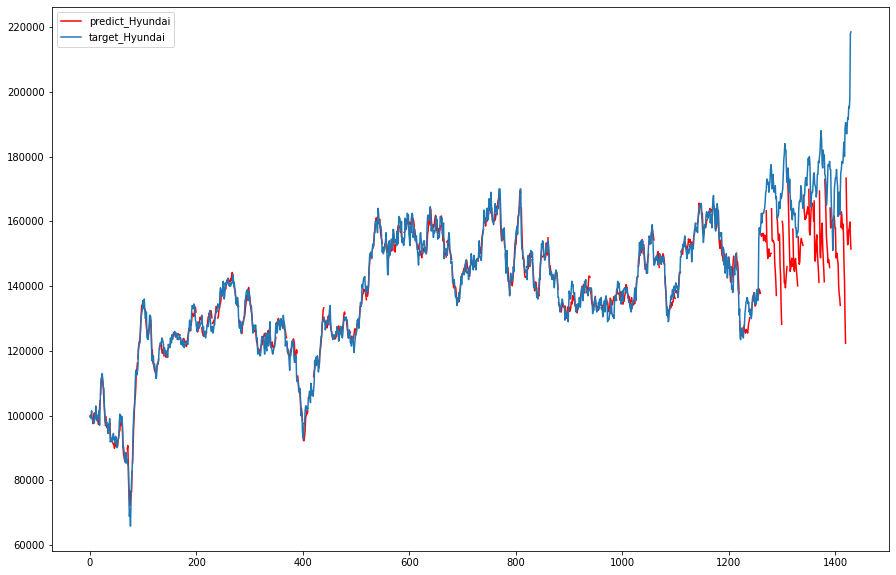

In [ ]:
plt.figure(figsize = (15,10))

companies_to_show = [0]#select one of [0,1,2,3] to see only one


    
for id_company in companies_to_show:
    for i in range(0,len(MP[id_company])):
        plt.plot([x + i*forward_days for x in range(len(MP[id_company][i]))], MP[id_company][i], color=colors[id_company])
    plt.plot(0,MP[id_company][0][0] ,color=colors[id_company], label='predict_{}'.format(companies_names[id_company])) #only to place the label

   

for id_company in companies_to_show:
    plt.plot(MT[id_company], label='target_{}'.format(companies_names[id_company]))

plt.legend(loc='best')
plt.show()